In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

In [22]:
# Define the categories
gender_categories   = ['Male', 'Female']
clothing_categories = ['Jeans', 'T-Shirt']

In [23]:
# Generate 50 samples
np.random.seed(1)  # For reproducibility
gender_samples   = np.random.choice(gender_categories,   size=25)
clothing_samples = np.random.choice(clothing_categories, size=25)

In [24]:
# Create DataFrame
df = pd.DataFrame({'gender': gender_samples, 'clothing_preference': clothing_samples})

In [25]:
df.sample(5)

,gender,clothing_preference
24,Female,Jeans
14,Female,Jeans
12,Male,Jeans
0,Female,Jeans
20,Male,T-Shirt


In [26]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['clothing_preference'])

In [27]:
contingency_table

clothing_preference,Jeans,T-Shirt
gender,,
Female,9,4
Male,2,10


In [28]:
# Perform chi-squared test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

In [29]:
# Print chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

Chi-squared statistic: 5.0264839327339335
P-value: 0.024962526384295327


In [34]:
contingency_table.shape

(2, 2)

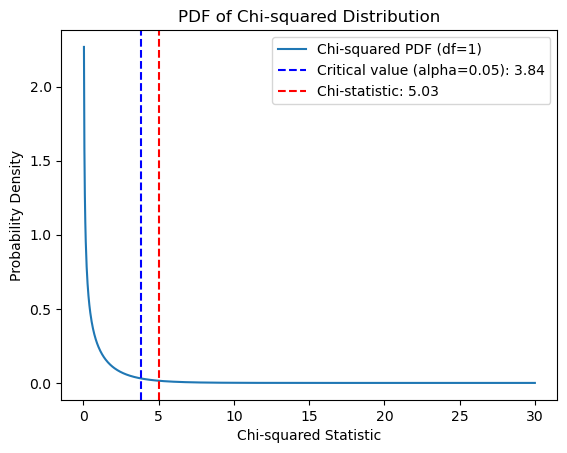

In [35]:
# Plot the PDF of the chi distribution
df_chi2  = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)  # Degrees of freedom
x        = np.linspace(0, 30, 1000)    # Define range for chi-statistic
pdf_chi2 = chi2.pdf(x, df_chi2)        # Calculate PDF values

# Calculate the critical value for alpha = 0.05
cv = chi2.ppf(0.95, df_chi2)

plt.plot(x, pdf_chi2, label=f'Chi-squared PDF (df={df_chi2})')

plt.axvline(cv,        color='blue', linestyle='--', label=f'Critical value (alpha=0.05): {cv:.2f}')
plt.axvline(chi2_stat, color='red',  linestyle='--', label=f'Chi-statistic: {chi2_stat:.2f}')


plt.xlabel('Chi-squared Statistic')
plt.ylabel('Probability Density')
plt.title('PDF of Chi-squared Distribution')
plt.legend()
plt.show()

compute the p-value 

In [36]:
# Calculate the chi-squared statistic
df        = df_chi2    # Example degrees of freedom
p_val     = 1 - chi2.cdf(chi2_stat, df)

print("P-value:", p_val)

P-value: 0.024962526384295303


$$
p_{\text {val }}=1-\text { chi2.cdf }(\text { chi2_stat }, d f)
$$
- $p_{\mathrm{val}}$ : 
    - This represents the $\mathrm{p}$-value of the chi-squared test. The $p$-value is the probability of observing a chi-squared statistic as extreme as, or more extreme than, the observed value under the null hypothesis.
    
- chi2.cdf(chi2_stat, $d f$ ): 
    - This part computes the cumulative distribution function (CDF) of the chi-squared distribution. The CDF gives the probability of observing a chi-squared statistic less than or equal to a certain value (chi2_stat).
    
- 1 - chi2.cdf(chi2_stat, $d f$ ): 
    - Since the chi-squared test is typically right-tailed (testing for the goodness of fit or independence), we subtract the CDF value from 1 to get the probability of observing a chi-squared statistic as extreme as, or more extreme than, the observed value.

In [ ]:
Intuition behind degrees of freedom